___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [2]:
import pandas as pd

In [3]:
bank_data = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [4]:
bank_data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

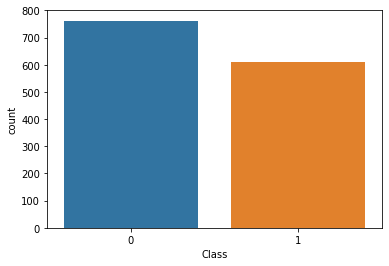

In [6]:
sns.countplot(x='Class',data=bank_data)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

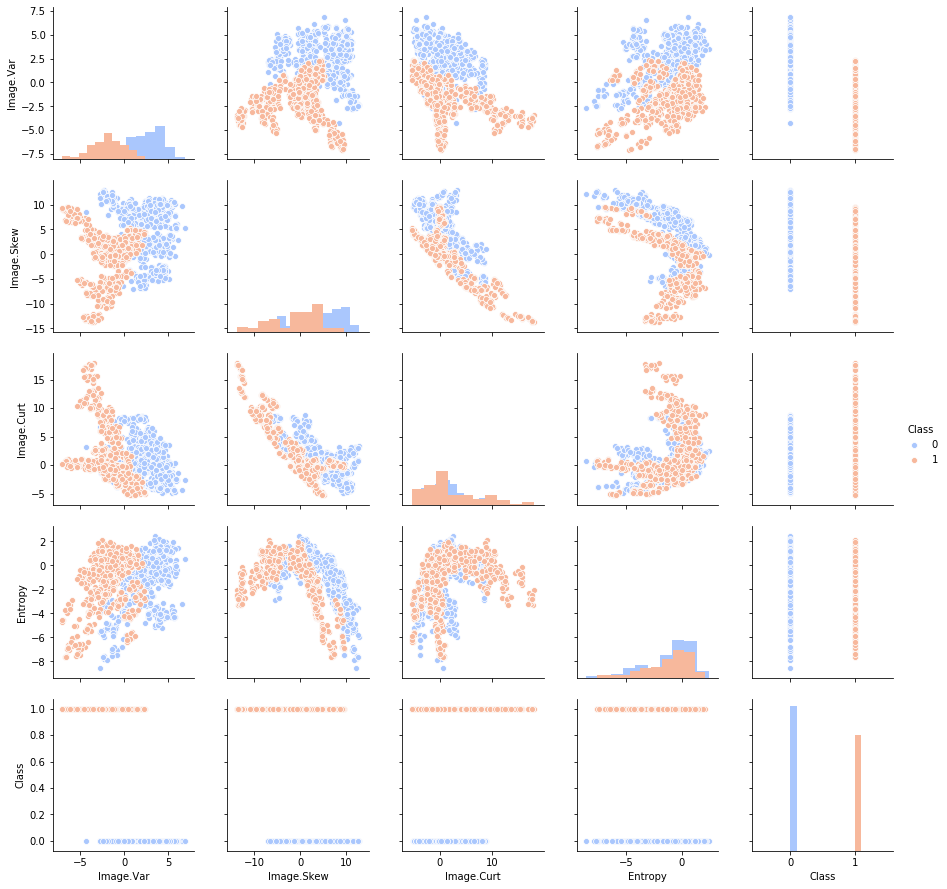

In [8]:
sns.pairplot(data=bank_data,hue='Class',palette='coolwarm',diag_kind='hist')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [9]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [10]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [11]:
scaler.fit(bank_data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [12]:
scaled_features = scaler.fit_transform(bank_data.drop('Class',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=bank_data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [14]:
X=df_feat

In [15]:
y=bank_data['Class']

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=101)

# Tensorflow

In [25]:
import tensorflow as tf

** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [20]:
X.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [22]:
feat_cols=[]

In [26]:
for col in X.columns:
    feat_cols += [tf.feature_column.numeric_column(col)]

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [27]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10],n_classes=2,feature_columns=feat_cols)

W0810 12:20:45.990904 16572 estimator.py:1811] Using temporary folder as model directory: C:\Users\jhon\AppData\Local\Temp\tmp13m8hqgj


** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=Xtrain,y=ytrain,batch_size=5,num_epochs=5,shuffle=True)

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [29]:
classifier.train(input_fn=input_func,steps=500)

W0810 12:24:35.693354 16572 deprecation.py:323] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0810 12:24:35.724317 16572 deprecation.py:323] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0810 12:24:35.729321 16572 deprecation.py:323] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_functions.py:

## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [30]:
pred_fn=tf.estimator.inputs.pandas_input_fn(x=Xtest,batch_size=len(Xtest),shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [31]:
predictions=list(classifier.predict(input_fn=pred_fn))

W0810 12:41:04.303511 16572 deprecation.py:323] From C:\Users\jhon\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [33]:
predictions[0]

{'logits': array([-10.035044], dtype=float32),
 'logistic': array([4.3928623e-05], dtype=float32),
 'probabilities': array([9.9995613e-01, 4.3834578e-05], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [34]:
final_preds=[]

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [36]:
for pred in predictions:
    final_preds += [pred['class_ids'][0]]

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,final_preds))

[[238   0]
 [  0 174]]


In [39]:
print(classification_report(ytest,final_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=200)

In [43]:
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
rfc_preds = rfc.predict(Xtest)

In [46]:
print(classification_report(ytest,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [48]:
print(confusion_matrix(ytest,rfc_preds))

[[234   4]
 [  0 174]]


** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!